### Author: Marktus A Atanga
### School: Johns Hopkins University
### Class: Introduction to Machine Learning
### Algorithm: K-maeans clustering from Scratch

In [1]:
import sys
import time
import seaborn as sns
import numpy as np
import pandas as pd
from math import floor, ceil
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.display.float_format = '{:,.6f}'.format
sys.path.append("c:\python38\lib\site-packages")
sns.set(style="whitegrid")
THEME = "darkslategray"

In [2]:
def scale_data(df):
    for column in df.columns:
        if (column=="class"):
            continue
        else:
            df[column] = (df[column] - df[column].mean())/df[column].std()
    return df

### Breast cancer data information
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [3]:
cancer_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
cancer_headers = ["sample_code", "clump_size", "uniform_cell_size", "uniform_cell_shape", 
                  "marginal_adhesion", "epithelial_cell_size", "bare_nuclei", 
                  "bland_chromatin", "normal_nucleoli", "mitoses", "class"]

df_cancer = pd.read_csv(cancer_file, sep="\s*,\s*", names = cancer_headers, engine='python')
df_cancer.replace("?", np.nan, inplace = True)
df_cancer.fillna(df_cancer.median(), inplace = True)
df_cancer["bare_nuclei"] = df_cancer.bare_nuclei.astype(int)
df_cancer["class"].replace({2: 0, 4: 1}, inplace=True)
df_cancer.drop(["sample_code"], axis = 1, inplace=True)

#scale the data
df_cancer = scale_data(df_cancer)

In [4]:
df_cancer.head(5)

,clump_size,uniform_cell_size,uniform_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666,0
1,0.206788,0.283642,0.266684,0.768071,1.708882,1.798376,-0.179534,-0.283909,-0.343666,0
2,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.410392,-0.179534,-0.611387,-0.343666,0
3,0.561934,1.594490,1.612618,-0.632794,-0.097558,0.141800,-0.179534,1.353485,-0.343666,0
4,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666,0


In [5]:
df_cancer["class"].unique()

array([0, 1], dtype=int64)

In [6]:
df_cancer.isnull().any()

clump_size              False
uniform_cell_size       False
uniform_cell_shape      False
marginal_adhesion       False
epithelial_cell_size    False
bare_nuclei             False
bland_chromatin         False
normal_nucleoli         False
mitoses                 False
class                   False
dtype: bool

In [7]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clump_size            699 non-null    float64
 1   uniform_cell_size     699 non-null    float64
 2   uniform_cell_shape    699 non-null    float64
 3   marginal_adhesion     699 non-null    float64
 4   epithelial_cell_size  699 non-null    float64
 5   bare_nuclei           699 non-null    float64
 6   bland_chromatin       699 non-null    float64
 7   normal_nucleoli       699 non-null    float64
 8   mitoses               699 non-null    float64
 9   class                 699 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 54.7 KB


### Glass data information
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
~~~
    11.1 building_windows_float_processed
    11.2 building_windows_non_float_processed
    11.3 vehicle_windows_float_processed
    11.4 vehicle_windows_non_float_processed (none in this database)
    11.5 containers
    11.6 tableware
    11.7 headlamps
 ~~~

In [8]:
glass_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

glass_headers = ["Id", "RI", "Na", "Mg", "Al","Si", "K", "Ca", "Ba", "Fe", "class"]        
df_glass = pd.read_csv(glass_file, sep="\s*,\s*", names = glass_headers, engine='python') 
df_glass.drop("Id", axis=1, inplace=True)

#scale the data
glass_data = scale_data(df_glass)

In [9]:
df_glass.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,0.870826,0.284287,1.251704,-0.690822,-1.124446,-0.670134,-0.145425,-0.352051,-0.585079,1
1,-0.248750,0.590433,0.634680,-0.170061,0.102080,-0.026152,-0.791877,-0.352051,-0.585079,1
2,-0.719631,0.149582,0.600016,0.190465,0.437760,-0.164148,-0.827010,-0.352051,-0.585079,1
3,-0.232286,-0.242285,0.697076,-0.310266,-0.052850,0.111844,-0.517838,-0.352051,-0.585079,1
4,-0.311315,-0.168810,0.648546,-0.410413,0.553957,0.081178,-0.623237,-0.352051,-0.585079,1


In [10]:
df_glass.isnull().any()

RI       False
Na       False
Mg       False
Al       False
Si       False
K        False
Ca       False
Ba       False
Fe       False
class    False
dtype: bool

In [11]:
df_glass["class"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [12]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.3):
    """
    This function split the data into 3 parts using the split ratios given (0.6:0.3:0.1)
    1. First shuffle the data to ensure that the data split is random
    2. calculate the size of each data
    """
    df_shuffled = df.sample(frac=1)

    n = len(df.index)

    train_end = int(train_percent * n)

    validate_end = int(validate_percent * n) + train_end

    train = df_shuffled.iloc[df_shuffled.index[:train_end]]

    validate = df_shuffled.iloc[df_shuffled.index[train_end:validate_end]]

    test = df_shuffled.iloc[df_shuffled.index[validate_end:]]

    train = train.reset_index(drop=True)
    validate = validate.reset_index(drop=True)
    test = test.reset_index(drop=True)

    return train, validate, test

train_set, validate_set, test_set = train_validate_test_split(df_cancer, train_percent=.6, validate_percent=.3)

In [13]:
# Backprop on the Seeds Dataset
from random import random
from math import exp
 
#Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

#Calculate neuron activation for an input
def summation(weights, inputs):
    weighting_sum = weights[-1]
    for i in range(len(weights)-1):
        weighting_sum += weights[i] * inputs[i]
    return weighting_sum

#neuron activation
def transfer(weighting_sum):
    try:
        sigmoid = 1.0 / (1.0 + exp(-weighting_sum))
    except OverflowError: #if extreme float values
        sigmoid = float('inf')
    return sigmoid

def softmax(z):
    e = np.exp(r - np.max(z))
    return e / e.sum(axis = 0)

## Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            sums = summation(neuron['weights'], inputs)
            neuron['output'] = transfer(sums)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, target):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1: #If hidden layer
            for j in range(len(layer)): #each node j in this hidden layer
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else: # If output layer
            for j in range(len(layer)): #each node j in this outer layer
                neuron = layer[j]
                errors.append(target[j] - neuron['output'])
        for j in range(len(layer)): #delta for each node j layer
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
            
#Backpropagation Algorithm With Stochastic Gradient Descent
def stochastic_gd(network, train, test, NUM_OUTPUTS, EPOCHS, LEARN_RATE):
    train_errors, test_errors = [], []
    for epoch in range(int(EPOCHS)):
        first_row = True
        for row in train:
            target = [0 for _ in range(int(NUM_OUTPUTS))]
            target[int(row[-1])] = 1
            forward_propagate(network, row)
            backward_propagate_error(network, target)    
            update_weights(network, row, LEARN_RATE)            
        train_errors.append(error_rate(network, train))
        test_errors.append(error_rate(network, test))   
    return network, train_errors, test_errors

#Update network weights with error
def update_weights(network, row, l_rate):    
    for i in range(len(network)):        
        if i != 0: #if not the first layer
            inputs = [neuron['output'] for neuron in network[i - 1]]
        else:
            inputs = row[:-1] #if the firt layer, use the inputs
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']
            
# Train a network for a fixed number of epochs
def momentum_stochastic_gd(network, train, test, NUM_OUTPUTS, EPOCHS, LEARN_RATE, MOMENTUM_RATE): 
    train_errors, test_errors = [], []
    for epoch in range(int(EPOCHS)):
        first_row = True
        for row in train:
            temp_delta = [neuron['delta'] for layer in network for neuron in layer] if not first_row else None
            target = [0 for _ in range(int(NUM_OUTPUTS))]
            target[int(row[-1])] = 1
            forward_propagate(network, row)
            backward_propagate_error(network, target)             
            momentum_weights_update(network, row, LEARN_RATE, temp_delta, MOMENTUM_RATE)
            first_row = False
        train_errors.append(error_rate(network, train))
        test_errors.append(error_rate(network, test))        
    return network, train_errors, test_errors

#Update network weights with error and a momentum term
def momentum_weights_update(network, row, l_rate, past_delta, momentum_rate):
    for i in range(len(network)): #each layer in the network
        if i != 0: #if not the first layer
            inputs = [neuron['output'] for neuron in network[i - 1]]
        else:
            inputs = row[:-1] #if the firt layer, use the inputs
        #for neuron in network[i]:
        for neuron, d in zip(network[i], range(0, len(network[i]))):
            for j in range(len(inputs)): #update the weights of layer i nodes j
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
                if past_delta is not None: # if there is a temporal delta
                    # update weight based on momentum rate term
                    neuron['weights'][j] += momentum_rate * past_delta[d]
            neuron['weights'][-1] += l_rate * neuron['delta'] #update the bias
    
def reset_neurons(network):
    """Resets neural outputs to zero after each backprop pass.
    Parameters:
        network : the neural network.
    """
    for layer in network:
        for neuron in layer:
            # we don't want to clobber the outputs later, so reset after every example
            neuron['output'] = 0

#Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

def error_rate(network, data):
    correct = 0
    for row in data:
        if predict(network, row) == float(row[-1]):
            correct += 1
    return (1-(correct / float(len(data)))) * 100.0

### Convert data from dataframe to numpy array

In [23]:
training = np.array(train_set)
validation = np.array(validate_set)
test =  np.array(test_set)

### Training without momentum

simulation time =  0:00:02.301837


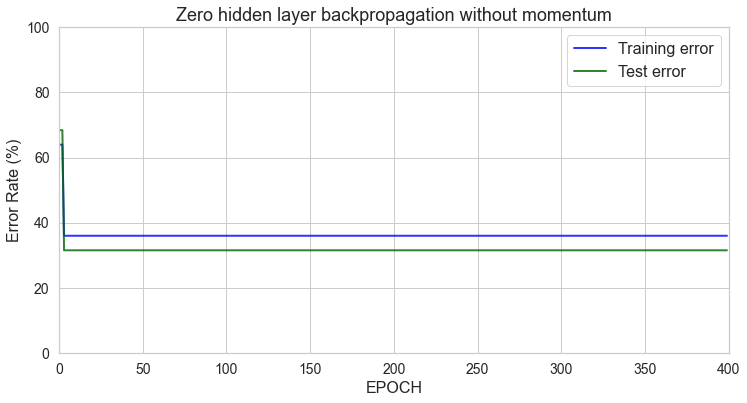

In [71]:
if __name__ == '__main__':    
    LAYERS = 0
    EPOCHS = 400
    LEARN_RATE =  0.001
    NUM_INPUTS = len(training[0][:-1])
    NUM_OUTPUTS = len(list(set([c[-1] for c in training])))    
    NETWORK = initialize_network(NUM_INPUTS, LAYERS, NUM_OUTPUTS) 
    start_time = datetime.now()
    NN0 = stochastic_gd(NETWORK, training, validataion, NUM_OUTPUTS, EPOCHS, LEARN_RATE)
    end_time = datetime.now()
    print("simulation time = ", end_time - start_time)
    
figure = plt.figure(figsize=(12, 6))
axes1 = figure.add_subplot(1, 1, 1)
axes1.plot(range(0, EPOCHS), NN0[1], color="blue", alpha=0.8, label = "Training error", lw=2)    
axes1.plot(range(0, EPOCHS), NN0[2], color="darkgreen", alpha=0.8, label = "Test error", lw=2)   
axes1.set_title(r"Zero hidden layer backpropagation without momentum", fontsize = 18)
axes1.set_xlabel("EPOCH", fontsize = 16)
axes1.set_ylabel("Error Rate (%)", fontsize = 16)
axes1.set_xlim(0, EPOCHS)
axes1.set_ylim(0, 100)
axes1.legend(loc = "upper right", fontsize = 16)
axes1.yaxis.grid( b=True, which="major")
axes1.tick_params(axis='both', which='major', labelsize=14)
plt.show()
plt.close()

simulation time =  0:00:05.999142


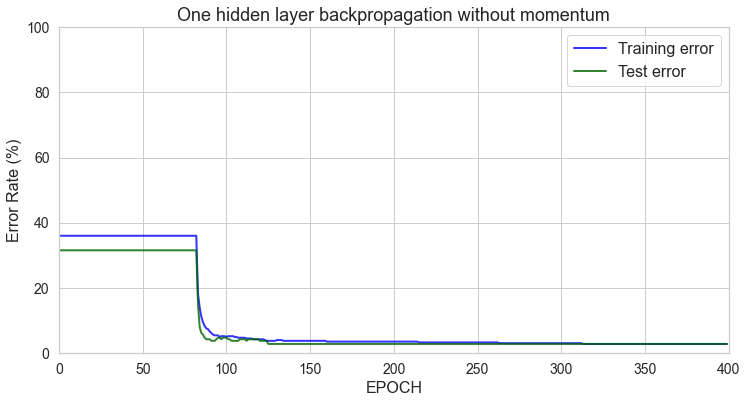

In [72]:
if __name__ == '__main__':    
    LAYERS = 1
    EPOCHS = 400
    LEARN_RATE =  0.001
    NUM_INPUTS = len(training[0][:-1])
    NUM_OUTPUTS = len(list(set([c[-1] for c in training])))    
    NETWORK = initialize_network(NUM_INPUTS, LAYERS, NUM_OUTPUTS) 
    start_time = datetime.now()
    NN1 = stochastic_gd(NETWORK, training, validataion, NUM_OUTPUTS, EPOCHS, LEARN_RATE)
    end_time = datetime.now()
    print("simulation time = ", end_time - start_time)
    
figure = plt.figure(figsize=(12, 6))
axes1 = figure.add_subplot(1, 1, 1)
axes1.plot(range(0, EPOCHS), NN1[1], color="blue", alpha=0.8, label = "Training error", lw=2)    
axes1.plot(range(0, EPOCHS), NN1[2], color="darkgreen", alpha=0.8, label = "Test error", lw=2)   
axes1.set_title(r"One hidden layer backpropagation without momentum", fontsize = 18)
axes1.set_xlabel("EPOCH", fontsize = 16)
axes1.set_ylabel("Error Rate (%)", fontsize = 16)
axes1.set_xlim(0, EPOCHS)
axes1.set_ylim(0, 100)
axes1.legend(loc = "upper right", fontsize = 16)
axes1.yaxis.grid( b=True, which="major")
axes1.tick_params(axis='both', which='major', labelsize=14)
plt.show()
plt.close()

simulation time =  0:00:09.128821


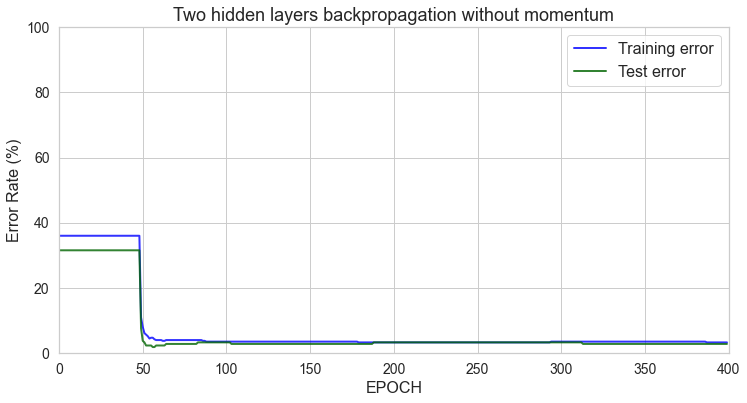

In [73]:
if __name__ == '__main__':    
    LAYERS = 2
    EPOCHS = 400
    LEARN_RATE =  0.001
    NUM_INPUTS = len(training[0][:-1])
    NUM_OUTPUTS = len(list(set([c[-1] for c in training])))    
    NETWORK = initialize_network(NUM_INPUTS, LAYERS, NUM_OUTPUTS) 
    start_time = datetime.now()
    NN2 = stochastic_gd(NETWORK, training, validataion, NUM_OUTPUTS, EPOCHS, LEARN_RATE)
    end_time = datetime.now()
    print("simulation time = ", end_time - start_time)
    
figure = plt.figure(figsize=(12, 6))
axes1 = figure.add_subplot(1, 1, 1)
axes1.plot(range(0, EPOCHS), NN2[1], color="blue", alpha=0.8, label = "Training error", lw=2)    
axes1.plot(range(0, EPOCHS), NN2[2], color="darkgreen", alpha=0.8, label = "Test error", lw=2)   
axes1.set_title(r"Two hidden layers backpropagation without momentum", fontsize = 18)
axes1.set_xlabel("EPOCH", fontsize = 16)
axes1.set_ylabel("Error Rate (%)", fontsize = 16)
axes1.set_xlim(0, EPOCHS)
axes1.set_ylim(0, 100)
axes1.legend(loc = "upper right", fontsize = 16)
axes1.yaxis.grid( b=True, which="major")
axes1.tick_params(axis='both', which='major', labelsize=14)
plt.show()
plt.close()

In [114]:
##print network
NN2[0]

[[{'weights': [0.5741235765912841,
    1.1680064985455616,
    0.7047741675757949,
    0.5236864533341835,
    0.891079970920518,
    1.2199133764410943,
    0.9282549879423835,
    0.6628259037349951,
    1.014043414790496,
    0.49846098140844974],
   'output': 0.011006788475815994,
   'delta': 5.584237646744014e-07},
  {'weights': [1.077450479000623,
    0.43838693050116373,
    1.0859059021043207,
    1.0181191128211684,
    0.3646389859985615,
    0.8671426817430226,
    0.821780703137983,
    0.2673664470547496,
    0.3526373325322075,
    0.031450637571016876],
   'output': 0.009965768384879762,
   'delta': 4.4453865419527935e-06}],
 [{'weights': [-1.7458360442100367, -2.0345560960920066, 1.9831370723334811],
   'output': 0.8747520507949186,
   'delta': -0.01734799391513058},
  {'weights': [2.220280041108444, 1.6629855207595197, -2.04077247066866],
   'output': 0.11922797688390882,
   'delta': 0.016149496596169762}]]

In [90]:
print("No hidden layer training converged error rate= ",NN0[1][-1])
print("No hidden layer validation converged error rate= ",NN0[2][-1])

print("One hidden layer training converged error rate= ",NN1[1][-1])
print("One hidden layer validation testing error rate= ",NN1[2][-1])

print("Two hidden layers training converged error rate= ",NN2[1][-1])
print("Two hidden layers validation converged error rate= ",NN2[2][-1])

No hidden layer training converged error rate=  36.038186157517906
No hidden layer validation converged error rate=  31.57894736842105
One hidden layer training converged error rate=  2.863961813842486
One hidden layer validation testing error rate=  2.8708133971291905
Two hidden layers training converged error rate=  3.341288782816232
Two hidden layers validation converged error rate=  2.8708133971291905


#### Predict test data and calculate error rate using the neural net without momentum

In [89]:
print("Zeror layer test error rate = ", error_rate(NN0[0], test))
print("One layer test error rate = ", error_rate(NN1[0], test))
print("Two layers test error rate = ", error_rate(NN2[0], test))

Zeror layer test error rate =  33.80281690140845
One layer test error rate =  1.4084507042253502
Two layers test error rate =  1.4084507042253502


### Back propagation with momentum

simulation time =  0:00:02.552165


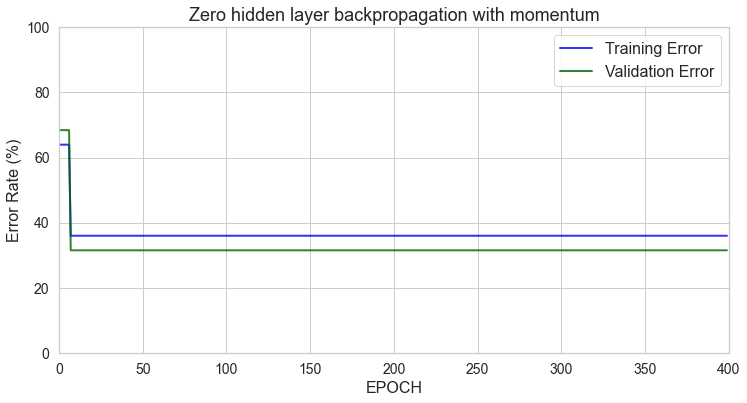

In [75]:
if __name__ == '__main__':    
    LAYERS = 0
    EPOCHS = 400
    LEARN_RATE = 0.001
    MOMENTUM_RATE = 0.01
    NUM_INPUTS = len(training[0][:-1])
    NUM_OUTPUTS = len(list(set([c[-1] for c in training])))
    
    start_time = datetime.now()
    NETWORK = initialize_network(NUM_INPUTS, LAYERS, NUM_OUTPUTS)    
    NNM0 = momentum_stochastic_gd(NETWORK, training, validation, NUM_OUTPUTS, EPOCHS, LEARN_RATE, MOMENTUM_RATE)
    end_time = datetime.now()
    print("simulation time = ", end_time - start_time)
figure = plt.figure(figsize=(12,6))
axes = figure.add_subplot(1, 1, 1)
axes.plot(range(0, EPOCHS), NNM0[1], color="blue", alpha=0.8, label = "Training Error", lw=2)    
axes.plot(range(0, EPOCHS), NNM0[2], color="darkgreen", alpha=0.8, label = "Validation Error", lw=2)   
axes.set_title(r"Zero hidden layer backpropagation with momentum", fontsize = 18)
axes.set_xlabel("EPOCH", fontsize = 16)
axes.set_ylabel("Error Rate (%)", fontsize = 16)
axes.legend(loc = "upper right", fontsize = 16)
axes.set_xlim(0, EPOCHS)
axes.set_ylim(0, 100)
axes.yaxis.grid( b=True, which="major")
axes.tick_params(axis='both', which='major', labelsize=14)

plt.show()
plt.close()

simulation time =  0:00:06.364206


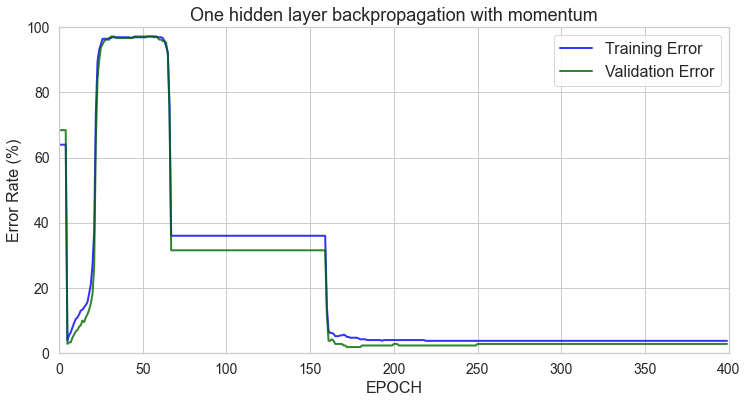

In [76]:
if __name__ == '__main__':    
    LAYERS = 1
    EPOCHS = 400
    LEARN_RATE = 0.001
    MOMENTUM_RATE = 0.01
    NUM_INPUTS = len(training[0][:-1])
    NUM_OUTPUTS = len(list(set([c[-1] for c in training])))
    
    start_time = datetime.now()
    NETWORK = initialize_network(NUM_INPUTS, LAYERS, NUM_OUTPUTS)    
    NNM1 = momentum_stochastic_gd(NETWORK, training, validation, NUM_OUTPUTS, EPOCHS, LEARN_RATE, MOMENTUM_RATE)
    end_time = datetime.now()
    print("simulation time = ", end_time - start_time)
figure = plt.figure(figsize=(12,6))
axes = figure.add_subplot(1, 1, 1)
axes.plot(range(0, EPOCHS), NNM1[1], color="blue", alpha=0.8, label = "Training Error", lw=2)    
axes.plot(range(0, EPOCHS), NNM1[2], color="darkgreen", alpha=0.8, label = "Validation Error", lw=2)   
axes.set_title(r"One hidden layer backpropagation with momentum", fontsize = 18)
axes.set_xlabel("EPOCH", fontsize = 16)
axes.set_ylabel("Error Rate (%)", fontsize = 16)
axes.legend(loc = "upper right", fontsize = 16)
axes.set_xlim(0, EPOCHS)
axes.set_ylim(0, 100)
axes.yaxis.grid( b=True, which="major")
axes.tick_params(axis='both', which='major', labelsize=14)

plt.show()
plt.close()

simulation time =  0:00:11.062427


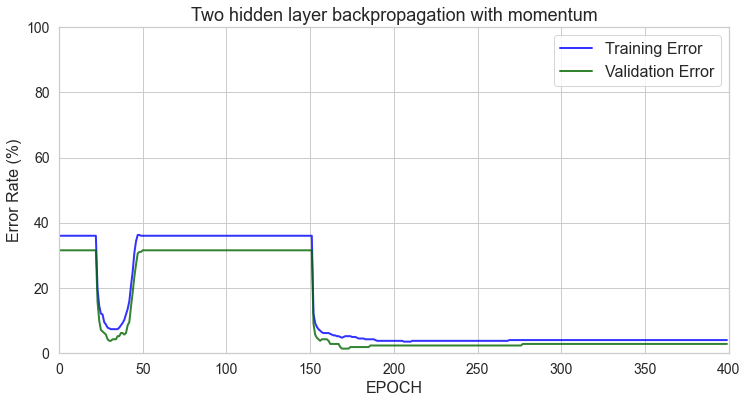

In [77]:
if __name__ == '__main__':    
    LAYERS = 2
    EPOCHS = 400
    LEARN_RATE = 0.001
    MOMENTUM_RATE = 0.01
    NUM_INPUTS = len(training[0][:-1])
    NUM_OUTPUTS = len(list(set([c[-1] for c in training])))
    
    start_time = datetime.now()
    NETWORK = initialize_network(NUM_INPUTS, LAYERS, NUM_OUTPUTS)    
    NNM2 = momentum_stochastic_gd(NETWORK, training, validation, NUM_OUTPUTS, EPOCHS, LEARN_RATE, MOMENTUM_RATE)
    end_time = datetime.now()
    print("simulation time = ", end_time - start_time)
figure = plt.figure(figsize=(12,6))
axes = figure.add_subplot(1, 1, 1)
axes.plot(range(0, EPOCHS), NNM2[1], color="blue", alpha=0.8, label = "Training Error", lw=2)    
axes.plot(range(0, EPOCHS), NNM2[2], color="darkgreen", alpha=0.8, label = "Validation Error", lw=2)   
axes.set_title(r"Two hidden layer backpropagation with momentum", fontsize = 18)
axes.set_xlabel("EPOCH", fontsize = 16)
axes.set_ylabel("Error Rate (%)", fontsize = 16)
axes.legend(loc = "upper right", fontsize = 16)
axes.set_xlim(0, EPOCHS)
axes.set_ylim(0, 100)
axes.yaxis.grid( b=True, which="major")
axes.tick_params(axis='both', which='major', labelsize=14)

plt.show()
plt.close()

In [112]:
##print network
NNM2[0]

[[{'weights': [-2.191928308827758,
    -1.6091967066333608,
    -2.148866626442385,
    -2.2440652755116837,
    -1.6185678464672792,
    -2.0777903260708506,
    -2.3397929671084987,
    -1.6230925737051607,
    -1.9756849819851034,
    -0.17230252470241963],
   'output': 0.9999938325568334,
   'delta': -9.435732578163788e-14},
  {'weights': [-2.313418737849238,
    -2.15160217492968,
    -1.7651127390534593,
    -1.5246016055901928,
    -1.6915097281719194,
    -1.9127766467181684,
    -2.1907058447583965,
    -2.15663167542079,
    -1.4802585263787524,
    -0.17724344630850583],
   'output': 0.9999922874062254,
   'delta': -5.972126896095873e-14}],
 [{'weights': [1.2739125248059755, 1.0317155780065668, -0.7965996378123678],
   'output': 0.8189148356825086,
   'delta': -0.06656365900490013},
  {'weights': [-2.562202260046996, -2.6198366275426905, 1.6750332182038623],
   'output': 0.029114572035068585,
   'delta': 0.020961143900664506}]]

#### Minimum errors achieved in tarining

In [91]:
print("No hidden layer momentum training converged error rate= ",NNM0[1][-1])
print("No hidden layer momentum validation converged error rate= ",NNM0[2][-1])

print("One hidden layer momentum training converged error rate= ",NNM1[1][-1])
print("One hidden layer momentum validation testing error rate= ",NNM1[2][-1])

print("Two hidden layers momentum training converged error rate= ",NNM2[1][-1])
print("Two hidden layers momentum validation converged error rate= ",NNM2[2][-1])

No hidden layer momentum training converged error rate=  36.038186157517906
No hidden layer momentum validation converged error rate=  31.57894736842105
One hidden layer momentum training converged error rate=  3.8186157517899777
One hidden layer momentum validation testing error rate=  2.8708133971291905
Two hidden layers momentum training converged error rate=  4.057279236276845
Two hidden layers momentum validation converged error rate=  2.8708133971291905


##### Predict test data and calculate error rate using the neural net without momentum

In [92]:
print("Zeror layer test error rate = ", error_rate(NNM0[0], test))
print("One layer test error rate = ", error_rate(NNM1[0], test))
print("Two layers test error rate = ", error_rate(NNM2[0], test))

Zeror layer test error rate =  33.80281690140845
One layer test error rate =  1.4084507042253502
Two layers test error rate =  1.4084507042253502


In [108]:
zero_layer_test_prediction = []
for row in test:
    zero_layer_test_prediction.append(predict(NNM0[0], row))

one_layer_test_prediction = []
for row in test:
    one_layer_test_prediction.append(predict(NNM1[0], row))
    
two_layers_test_prediction = []
for row in test:
    two_layers_test_prediction.append(predict(NNM2[0], row))

In [111]:
test_set["class_zero_layer"] = zero_layer_test_prediction
test_set["class_one_layer"] = one_layer_test_prediction
test_set["class_two_layer"] = two_layers_test_prediction
test_set.to_csv("test_set_with_prediction.csv", index = False)

In [110]:
test_set

,clump_size,uniform_cell_size,uniform_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,class_zero_layer,class_one_layer,class_two_layer
0,1.272227,-0.371782,0.266684,-0.632794,0.805662,-0.686488,0.640688,0.371049,1.405526,1,0,1,1
1,1.627373,2.249915,2.285586,2.519152,3.063712,1.798376,2.691243,2.335921,-0.343666,1,0,1,1
2,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.686488,-0.999756,-0.611387,-0.343666,0,0,0,0
3,1.272227,2.249915,2.285586,1.468503,3.063712,1.798376,1.460910,0.043570,3.737781,1,0,1,1
4,1.982519,-0.044070,0.603167,-0.632794,3.063712,0.417896,-0.179534,2.335921,0.239398,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-0.503505,0.283642,0.266684,2.519152,0.805662,-0.686488,-0.179534,0.043570,-0.343666,1,0,1,1
67,0.917080,-0.044070,0.266684,0.417854,-0.097558,-0.134296,-0.179534,-0.283909,3.154718,1,0,1,1
68,-0.503505,-0.699494,-0.742767,-0.282578,-0.549168,-0.686488,-0.999756,-0.611387,-0.343666,0,0,0,0
69,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.589645,-0.611387,-0.343666,0,0,0,0
